<a href="https://colab.research.google.com/github/Whereamiactually/lyceumcompling10/blob/main/TextAnalysis_Statistics_Vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ текста и немного графиков

Будем работать с довольно большим произведением "Герой нашего времени".

Вот так можно считать .txt файл в строку.

In [7]:
with open('geroy-nashego-vremeni.txt', encoding = 'utf-8') as file:
  geroy = file.read()

In [8]:
geroy[100:150] # проверяем, нормально ли считалось

' вместе с тем последняя вещь; оно или служит объяс'

Теперь мы хотим посмотреть на самые частотные слова в этом тексте и построить график.

Для всего этого нужно для начала разбить текст на токены.

In [9]:
pip install razdel

In [10]:
from razdel import tokenize

In [ ]:
tokens_raw = list(tokenize(geroy)) # делаем список подстрок
tokens = [word.text for word in tokens_raw] # делаем список слов
tokens[:40]

Теперь мы хотим убрать знаки препинания, привести все слова к нижнему регистру, и убрать стоп-слова, чтобы нам было удобнее считать статистику.

* `.lower()` приводит все буквы к нижему регистру;
* `.isalpha()` возвращает True, если в строке есть только буквы.

In [22]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
stopwords.extend(['который', 'это', 'всё', 'весь', 'мочь', 'свой']) # нам не хватает этих слов в этом списке

In [54]:
stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
only_words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords]
only_words[:30]

In [41]:
import collections # импортируем модуль, с помощью которого будем считать слова
counter = collections.Counter(only_words)

In [ ]:
counter # по сути это словарь, ключами которого являются слова, а их значениями - их количества

In [43]:
counter['княжна'] # находим количество по значению

44

Мы получили список наиболее частотных слов, но не лемм.

In [44]:
counter.most_common(15)

[('сказал', 187),
 ('отвечал', 83),
 ('грушницкий', 83),
 ('очень', 75),
 ('глаза', 65),
 ('руку', 48),
 ('моей', 46),
 ('печорин', 46),
 ('долго', 44),
 ('тебе', 44),
 ('княжна', 44),
 ('кажется', 43),
 ('мог', 43),
 ('стал', 42),
 ('несколько', 42)]

Теперь посмотрим на леммы.

In [45]:
pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 60.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=c9c5c8993179a16f1856786b48e1dd00eedf452f517b624af470d5eaba854e8a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [46]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [76]:
data = []
for word in only_words:
    ana = morph.parse(word)[0] # кладем в переменную разбор
    razbor = {'lex': ana.normal_form, # вытаскиваем лемму
              'word': ana.word,
              'POS': ana.tag.POS,  # часть речи
              'gender': ana.tag.gender,
              'animacy': ana.tag.animacy}
    data.append(razbor)

In [77]:
data[:10]

[{'lex': 'михаил',
  'word': 'михаил',
  'POS': 'NOUN',
  'gender': 'masc',
  'animacy': 'anim'},
 {'lex': 'юриевич',
  'word': 'юрьевич',
  'POS': 'NOUN',
  'gender': 'masc',
  'animacy': 'anim'},
 {'lex': 'лермонтов',
  'word': 'лермонтов',
  'POS': 'NOUN',
  'gender': 'masc',
  'animacy': 'anim'},
 {'lex': 'герой',
  'word': 'герой',
  'POS': 'NOUN',
  'gender': 'masc',
  'animacy': 'anim'},
 {'lex': 'наш',
  'word': 'нашего',
  'POS': 'ADJF',
  'gender': 'neut',
  'animacy': None},
 {'lex': 'время',
  'word': 'времени',
  'POS': 'NOUN',
  'gender': 'neut',
  'animacy': 'inan'},
 {'lex': 'всякий',
  'word': 'всякой',
  'POS': 'ADJF',
  'gender': 'femn',
  'animacy': None},
 {'lex': 'книга',
  'word': 'книге',
  'POS': 'NOUN',
  'gender': 'femn',
  'animacy': 'inan'},
 {'lex': 'предисловие',
  'word': 'предисловие',
  'POS': 'NOUN',
  'gender': 'neut',
  'animacy': 'inan'},
 {'lex': 'первый',
  'word': 'первая',
  'POS': 'ADJF',
  'gender': 'femn',
  'animacy': None}]

In [79]:
import pandas as pd
df = pd.DataFrame(data) # вот так можно легко преобразовать список словарей в датафрейм, где ключи это названия столбцов

In [80]:
df

,lex,word,POS,gender,animacy
0,михаил,михаил,NOUN,masc,anim
1,юриевич,юрьевич,NOUN,masc,anim
2,лермонтов,лермонтов,NOUN,masc,anim
3,герой,герой,NOUN,masc,anim
4,наш,нашего,ADJF,neut,None
...,...,...,...,...,...
23804,добиться,добиться,INFN,None,None
23805,вообще,вообще,ADVB,None,None
23806,любить,любит,VERB,None,None
23807,метафизический,метафизических,ADJF,None,None


Вынем все леммы (они уже без стоп-слов).

In [51]:
lemmas = list(df['lex'])

In [52]:
counter = collections.Counter(lemmas)
counter.most_common(15)

[('сказать', 281),
 ('мой', 208),
 ('который', 154),
 ('знать', 140),
 ('свой', 131),
 ('говорить', 123),
 ('грушницкий', 122),
 ('рука', 119),
 ('отвечать', 112),
 ('хотеть', 109),
 ('один', 108),
 ('человек', 103),
 ('глаз', 101),
 ('княжна', 94),
 ('мочь', 93)]

Все равно некоторые стоп-слова не убрались. Почему?

Уберем их.

In [53]:
new_lemmas = [lemma for lemma in lemmas if lemma not in stopwords]
counter = collections.Counter(new_lemmas)
counter.most_common(15)

[('сказать', 281),
 ('знать', 140),
 ('говорить', 123),
 ('грушницкий', 122),
 ('рука', 119),
 ('отвечать', 112),
 ('хотеть', 109),
 ('человек', 103),
 ('глаз', 101),
 ('княжна', 94),
 ('стать', 92),
 ('любить', 91),
 ('видеть', 79),
 ('очень', 75),
 ('печорин', 71)]

Теперь нарисуем график по получившимся данным!

In [55]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt # библиотека для рисования графиков (и не только)

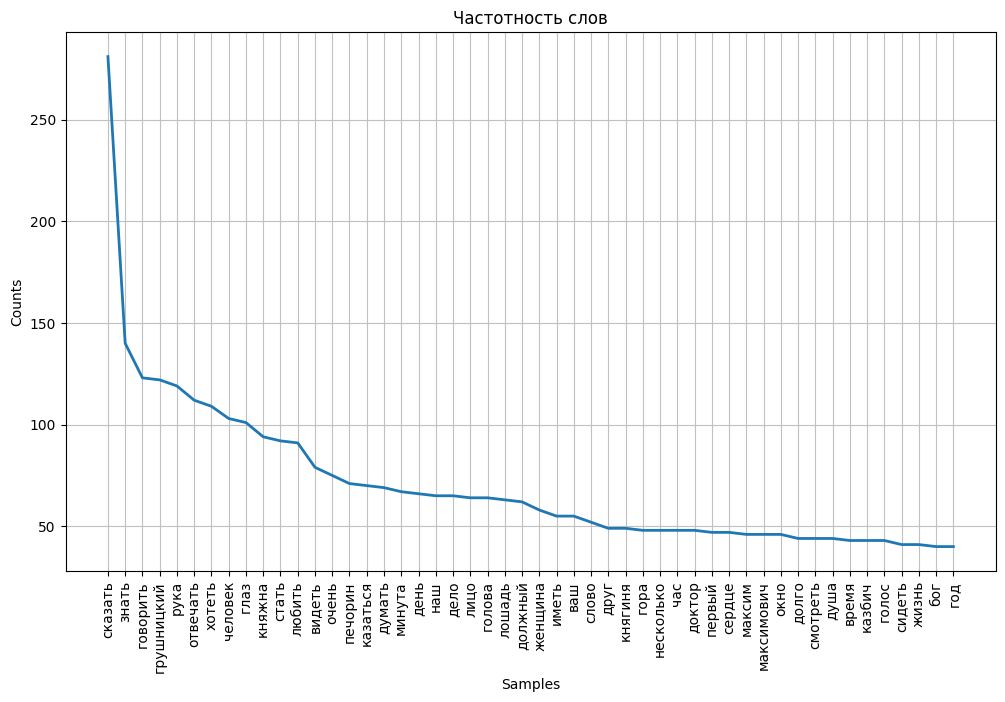

In [64]:
plt.figure(figsize = (12, 7)) # задаем размер графика
plt.title('Частотность слов') # название
fdist = FreqDist(new_lemmas) # делаем такой же подсчет частотности, как и до этого, но с помощью другой функции
fdist.plot(50, cumulative = False) # число отвечает за количество выводимых точек

plt.show()

Есть такой закон - **Закон Ципфа** (подробнее можно почитать [тут](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A6%D0%B8%D0%BF%D1%84%D0%B0)).

Это эмпирическая закономерность распределения частотности слов естественного языка: если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частотности их использования, то **частотность n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n** (так называемому рангу этого слова).

Например, второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и так далее.

Бывают еще круговые диаграммы!

In [65]:
df['POS'].value_counts() # считаем количество значений в столбце

NOUN    8938
VERB    5751
ADJF    3565
ADVB    1675
INFN    1046
GRND     444
ADJS     429
NPRO     391
CONJ     306
PRTF     289
PREP     257
NUMR     168
PRCL     138
PRTS     132
COMP     109
INTJ      36
PRED      31
Name: POS, dtype: int64

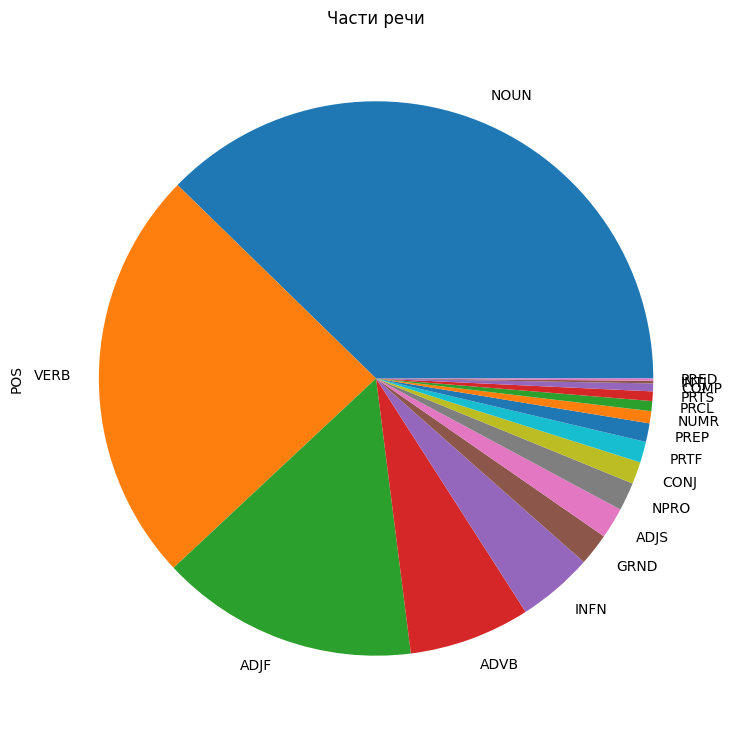

In [66]:
plt.figure(figsize = (9, 9))
df['POS'].value_counts().plot(kind = 'pie') # задаем тип графика
plt.title('Части речи')

plt.show()

То же самое, только на столбчатой диаграмме.

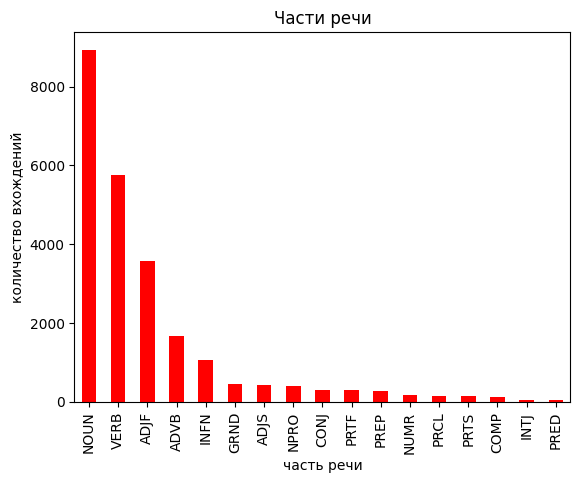

In [69]:
plt.title('Части речи')
df['POS'].value_counts().plot(kind = 'bar', color = 'red') # также можно задать цвет столбцов
plt.xlabel('часть речи') # название оси икс
plt.ylabel('количество вхождений') # название оси игрек

plt.show()

Можем посмотреть на связь рода и одушевленности.

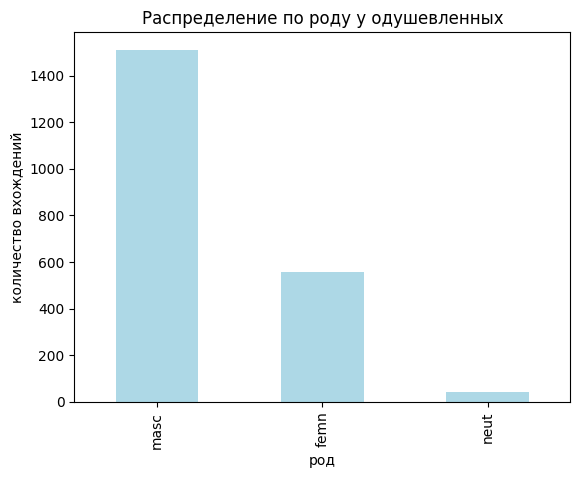

In [85]:
df[df['animacy'] == 'anim']['gender'].value_counts().plot.bar(color = 'lightblue')

plt.title('Распределение по роду у одушевленных')
plt.xlabel('род')
plt.ylabel('количество вхождений')
plt.show()

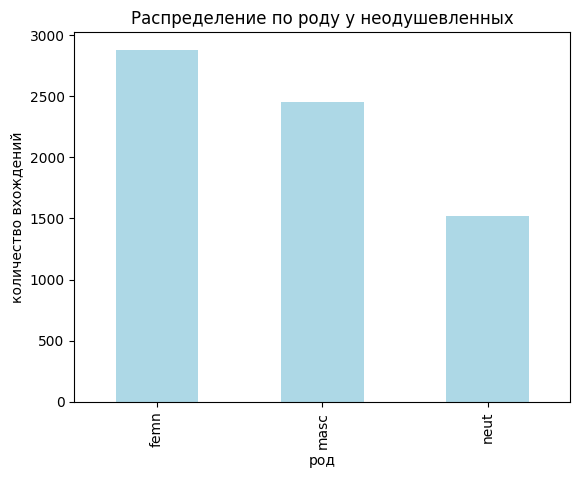

In [87]:
df[df['animacy'] == 'inan']['gender'].value_counts().plot.bar(color = 'lightblue')

plt.title('Распределение по роду у неодушевленных')
plt.xlabel('род')
plt.ylabel('количество вхождений')
plt.show()

Также мы можем строить крутые облака слов по их частотности!

In [89]:
pip install wordcloud

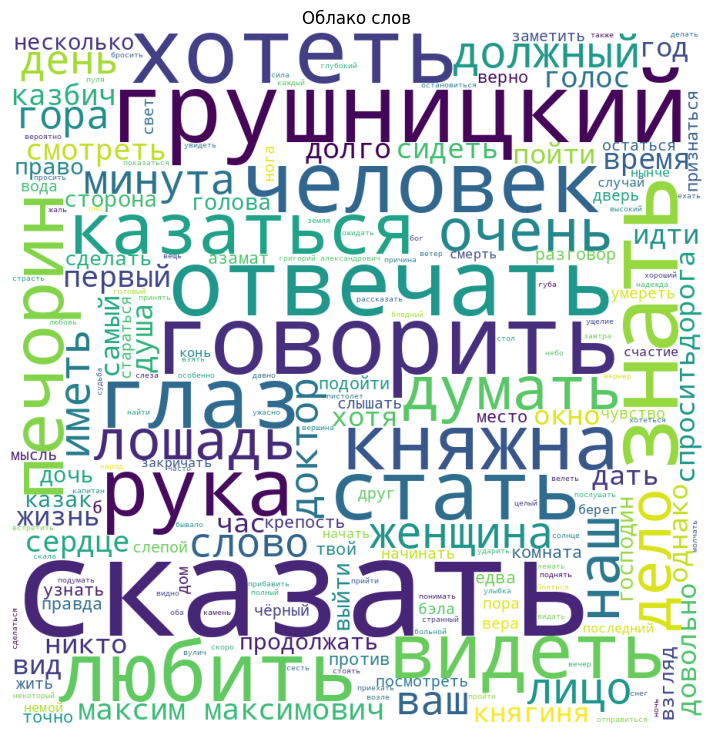

In [92]:
from wordcloud import WordCloud

text = ' '.join([word for word in df['lex'].values if word not in stopwords])

wordcloud = WordCloud(background_color = 'white', # цвет фона
                      width = 900,
                      height = 900).generate(text)

plt.figure(figsize = (9, 9), facecolor = None) # цвет границ
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов')

plt.show()

Теперь давайте посмотрим на биграммы, то есть на двухсловные сочетания!

У NLTK есть встроенный модуль, который позволит на это сделать.

In [93]:
bigr = list(nltk.bigrams(new_lemmas)) # считает биграммы
bigr_counter = collections.Counter(bigr) # считает их частотность

In [94]:
bigr_counter.most_common(15)

[(('максим', 'максимович'), 46),
 (('григорий', 'александрович'), 24),
 (('драгунский', 'капитан'), 15),
 (('взять', 'рука'), 13),
 (('бог', 'знать'), 12),
 (('друг', 'друг'), 11),
 (('покачать', 'голова'), 10),
 (('крайний', 'мера'), 9),
 (('схватить', 'рука'), 9),
 (('несколько', 'минута'), 9),
 (('княжна', 'мери'), 9),
 (('солдатский', 'шинель'), 9),
 (('проходить', 'мимо'), 9),
 (('молодой', 'человек'), 8),
 (('целый', 'день'), 8)]

Облако слов для биграмм. Отдельно задаем порог вхождения - не ниже 3.

Мы можем поменять цвет с помощью `colormap = 'ваша палитра'` (палитры можно посмотреть [здесь](https://www.kaggle.com/code/niteshhalai/wordcloud-colormap)).

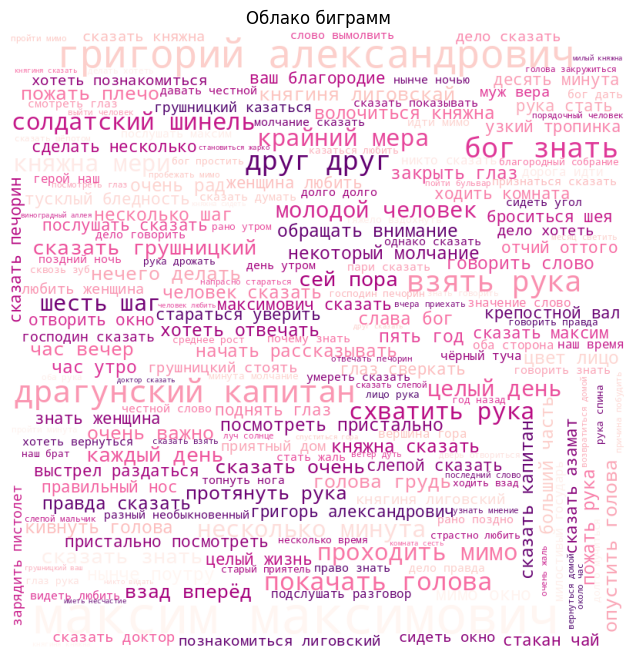

In [100]:
wordcloud = WordCloud(background_color = 'white',
                      width = 800,
                      height = 800,
                      collocation_threshold = 3, colormap = 'RdPu').generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако биграмм')

plt.show()

Также мы можем посмотреть, когда в действии участвовал тот или иной персонаж!

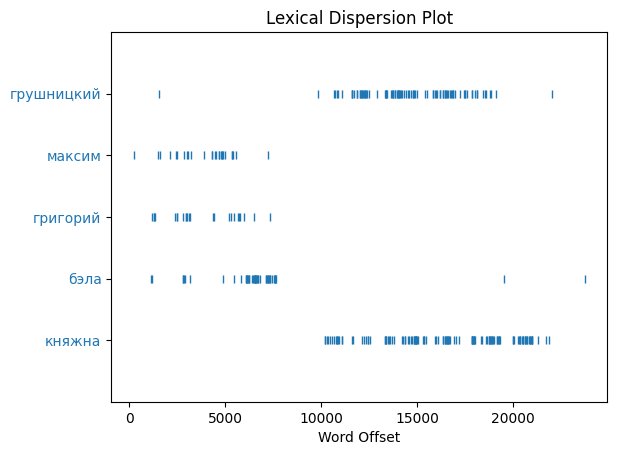

In [111]:
from nltk.draw.dispersion import dispersion_plot

text = nltk.Text(df['lex'].tolist())
text.dispersion_plot(["княжна", "бэла", "григорий", 'максим', 'грушницкий'])

Какие выводы можно отсюда сделать?